<a href="https://colab.research.google.com/github/fkihu/Model-Quality-and-Improvement-Assignment/blob/main/Week_6D2_Assignment_The_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Notebook: The Linear Regression Model

## 1. Introduction

We started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this project, you can practice what you learned by exploring ways to improve the models we built.

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

**Tasks**

1. Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
2. Read `AmesHousing.tsv` () into a pandas data frame.
3. For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
* Create a function named `transform_features()` that, for now, just returns the train data frame.
* Create a function named `select_features()` that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
* Create a function named `train_and_test()` that, for now:

1. Selects the first 1460 rows from from data and assign to train.
2. Selects the remaining rows from data and assign to test.
3. Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from `select_features()`
4. Tests the model on the test set and returns the `RMSE` value.

In [ ]:
# Importing the prerequisite libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize


In [ ]:
# Reading the data

data = pd.read_csv('https://bit.ly/3boZCX4', delimiter="\t")
data.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [ ]:
# Create a function named transform_features() that, for now, just returns the train data frame.

def transform_features():
  train = data[0: 1460]
  return
transform_features()

In [ ]:
# Create a function named select_features() that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.

def select_features():
  transform_features()
  train['Gr Liv Area', 'SalePrice']
  return

In [ ]:
# Create a function named train_and_test() that, for now:
# Selects the first 1460 rows from data and assign to train.
# Selects the remaining rows from data and assign to test.
# Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from select_features()
# Tests the model on the test set and returns the RMSE value.
from sklearn.metrics import mean_squared_error

def train_and_test():
  train = data[0: 1460]
  test = data[1460:]
  train_numeric = train.select_dtypes(include = ['int', 'float'])
  train_select_features = train_numeric.drop(['PID','Order', 'Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold', 'SalePrice'], axis = 1)
  target = data['SalePrice']
  model = LinearRegression()
  model.fit(select_features, target)
  test_numeric = test.select_dtypes(include = ['int', 'float'])
  test_features = test_numeric.drop['SalePrice']
  pred_saleprice = model.predict(test_features)
  test_rmse = np.sqrt(mean_squared_error(test['SalePrice'],pred_saleprice))
  print ("test rmse:", test_rmse)
  return
  

In [ ]:
data.select_dtypes(include = ['int', 'float'])
data.drop(['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold'], axis = 1)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


## 2. Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage.
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc).
* create new features by combining other features.

Next, you need to get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn have made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features are still more of an art that requires a bit of human ingenuity.

**Tasks**

1. As we mentioned earlier, we recommend adding some cells to explore and experiment with different features (before rewriting these functions).

2. The `transform_features()` function shouldn't modify the train data frame and instead return a new one entirely. This way, we can keep using train in the experimentation cells.

3. Which columns contain less than 5% missing values?
* For numerical columns that meet this criteria, let's fill in the missing values using the most popular value for that column.

4. What new features can we create, that better capture the information in some of the features?
* An example of this would be the `years_until_remod` feature we created in the last lesson.

5. Which columns need to be dropped for other reasons?
* Which columns aren't useful for machine learning?
* Which columns leak data about the final sale?

In [ ]:
# Your code goes here
data.isnull().sum()


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

## 3. Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

**Tasks**

1. Generate a correlation heatmap matrix of the numerical features in the training data set.
* Which features correlate strongly with our target column, `SalePrice`?
* Calculate the correlation coefficients for the columns that seem to correlate well with `SalePrice`. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.

2. Which columns in the data frame should be converted to the categorical data type? All of the columns that can be categorized as nominal variables are candidates for being converted to categorical. Here are some other things you should think about:
* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).

3. Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?

4. What are some ways we can explore which categorical columns "correlate" well with `SalePrice`?

5. Update the logic for the `select_features()` function. This function should take in the new, modified train and test data frames that were returned from `transform_features()`.

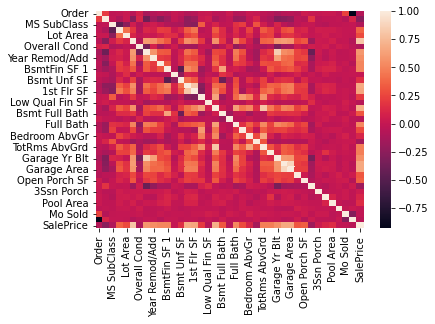

In [ ]:
# Generate a correlation heatmap matrix of the numerical features in the training data set.
train = data[0: 1460]
test = data[1460:]

numerical_train = train.select_dtypes(include=['int', 'float'])
corr = numerical_train.corr()

sns.heatmap(corr)

In [ ]:
SalePrice_corr = corr.SalePrice
sorted_corrs = SalePrice_corr.sort_values(ascending = False)
sorted_corrs.head(10)

SalePrice         1.000000
Overall Qual      0.804562
Gr Liv Area       0.698990
Total Bsmt SF     0.683037
Garage Cars       0.663485
Garage Area       0.662397
1st Flr SF        0.657119
Year Built        0.591436
Garage Yr Blt     0.561873
Year Remod/Add    0.545219
Name: SalePrice, dtype: float64

**Which features correlate strongly with our target column, SalePrice?**

Calculate the correlation coefficients for the columns that seem to correlate well with SalePrice.


Overall Qual      0.804562

Gr Liv Area       0.698990

Total Bsmt SF     0.683037

Garage Cars       0.663485

Garage Area       0.662397

1st Flr SF        0.657119

Year Built        0.591436

Garage Yr Blt     0.561873

Year Remod/Add    0.545219


In [ ]:
# Which columns in the data frame should be converted to the categorical data type? 

text_cols = data.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(train[col].unique()))


MS Zoning: 6
Street: 2
Alley: 3
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Mas Vnr Type: 5
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Bsmt Qual: 5
Bsmt Cond: 6
Bsmt Exposure: 5
BsmtFin Type 1: 7
BsmtFin Type 2: 7
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Fireplace Qu: 6
Garage Type: 7
Garage Finish: 4
Garage Qual: 6
Garage Cond: 6
Paved Drive: 3
Pool QC: 2
Fence: 5
Misc Feature: 4
Sale Type: 9
Sale Condition: 5


In [ ]:
print(data.shape)
2930*0.05

(2930, 82)


146.5

In [ ]:
# Your code goes here
# Which columns contain less than 5% missing values?

col_mv = data.isnull().sum()
col_mv
missing_values = col_mv[col_mv < 147]
missing_values

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 71, dtype: int64

## 4. Train and Test

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named `k` that controls the type of cross validation that occurs.

**Tasks**

1. The optional `k` parameter should accept integer values, with a default value of `0`.

2. When `k` equals `0`, perform holdout validation (what we already implemented):

* Select the first `1460` rows and assign to `train`.
* Select the remaining rows and assign to test.
* Train on `train` and `test` on test.
* Compute the `RMSE` and return.

3. When k equals 1, perform simple cross validation:

* Shuffle the ordering of the rows in the data frame.
* Select the first 1460 rows and assign to `fold_one`.
* Select the remaining rows and assign to `fold_two`.
* Train on `fold_one` and test on `fold_two`.
* Train on `fold_two` and test on `fold_one`.
* Compute the average RMSE and return.

4. When `k` is greater than `0`, implement k-fold cross validation using `k` folds:

* Perform `k-fold` cross validation using k folds.
* Calculate the average `RMSE` value and return this value.

In [ ]:
# Your code goes here

## 5. Next Steps

That's it for the guided steps. Here's some potenial next steps that you can take:

1. Continue iteration on feature engineering:
* Research some other approaches to feature engineering online around housing data.
* Visit the Kaggle kernels [page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) page for this dataset to see approaches others took.

2. Improve your feature selection:
* Research ways of doing feature selection better with categorical columns (something we didn't cover in this particular course).